Laden der benötigten Bibliotheken und des UCI ML Repository Heart Disease Datensatzes (https://archive.ics.uci.edu/ml/datasets/statlog+(heart)):

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/heart.dat', delimiter=' ', header=None)
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = columns

Schauen wir uns den Datensatz einmal an:

In [26]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1


Gibt es unbesetzte Merkmale?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       269 non-null    float64
 1   sex       269 non-null    float64
 2   cp        269 non-null    float64
 3   trestbps  269 non-null    float64
 4   chol      269 non-null    float64
 5   fbs       269 non-null    float64
 6   restecg   269 non-null    float64
 7   thalach   269 non-null    float64
 8   exang     269 non-null    float64
 9   oldpeak   269 non-null    float64
 10  slope     269 non-null    float64
 11  ca        269 non-null    float64
 12  thal      269 non-null    float64
 13  target    269 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.5 KB


Wir konzentrieren uns im folgenden auf das `chol` Merkmal (Serum Cholesterol in mg/dl), schauen wir uns die statistische Kennwerte und das Boxplot-Diagramm an:

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.375465,0.676580,3.171004,131.349442,249.390335,0.148699,1.018587,149.828996,0.330855,1.044981,1.583643,0.661710,4.702602,1.442379
std,9.076186,0.468653,0.950518,17.894712,51.592983,0.356455,0.997959,23.075002,0.471398,1.144366,0.615011,0.934847,1.941503,0.497595
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [36]:
%pip install seaborn
import seaborn as sns

<AxesSubplot:ylabel='chol'>

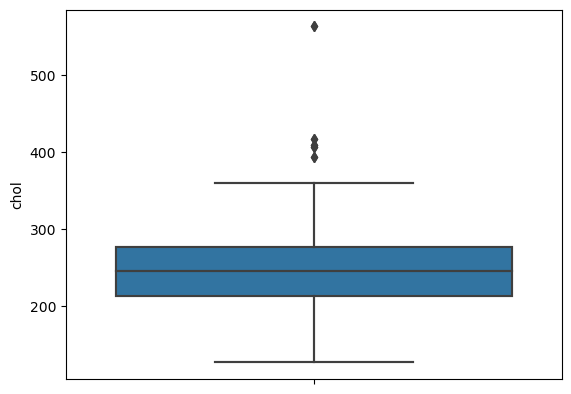

In [37]:
sns.boxplot(y = df.chol)

Offenbar gibt es extreme Werte für dieses Merkmal. Im ersten Ansatz verwenden wir die Quantilmethode um die Ausreißer zu identifizieren und zu entfernen:

In [52]:
quantil1 = df.chol.quantile(0.25)
quantil3 = df.chol.quantile(0.75)
iqr = quantil3-quantil1
threshold_low  = quantil1 - 1.5*iqr
threshold_high = quantil3 + 1.5*iqr
df_cleared = df.loc[(df.chol > threshold_low) & (df.chol < threshold_high)]

<AxesSubplot:ylabel='chol'>

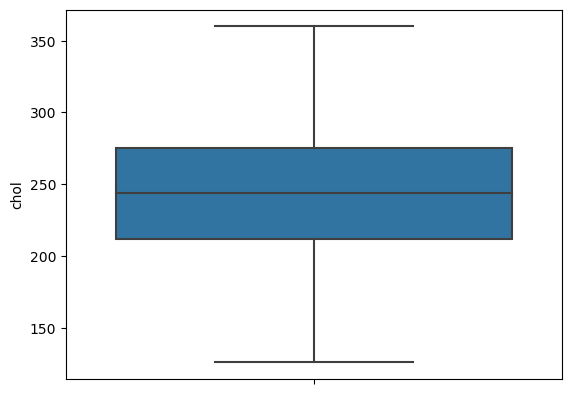

In [53]:
sns.boxplot(y = df_cleared.chol)

Offenbar konnten die Werte, die auch im Boxplot als Ausreißer gekennzeichnet wurden, entfernt werden. Eine andere Visualisierung:

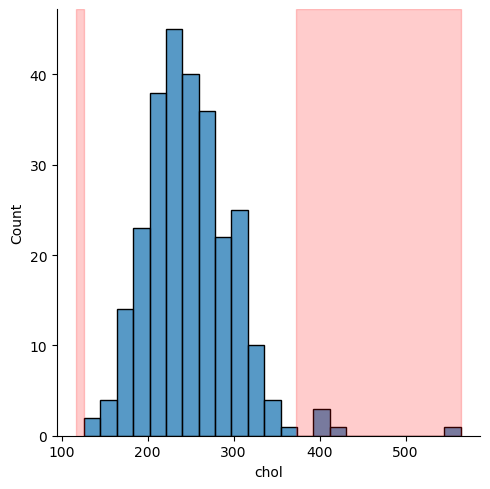

In [55]:
sns.displot(df.chol, kde=False)
plt.axvspan(xmin = threshold_low,xmax=df_cleared.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = threshold_high,xmax= df.chol.max(),alpha=0.2, color='red')

Wenn wir von einer Normalverteilung ausgehen, können wir diese für die Ausreißererkennung heranziehen.
Dazu bestimmen wir zunächst die Parameter der Verteilung und anhand dieser die Grenzwerte für die
erlaubte Abweichung vom Erwartungswert der Verteilung (Konstante c = 3):

In [56]:
mean, std = df.chol.mean(), df.chol.std()
cutoff = 3*std
threshold_low  = mean - cutoff
threshold_high = mean + cutoff
df_cleared2 = df.loc[(df.chol > threshold_low) & (df.chol < threshold_high)]

<AxesSubplot:ylabel='chol'>

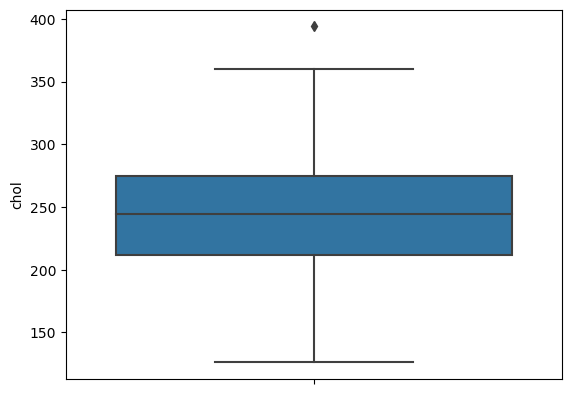

In [57]:
sns.boxplot(y = df_cleared2.chol)

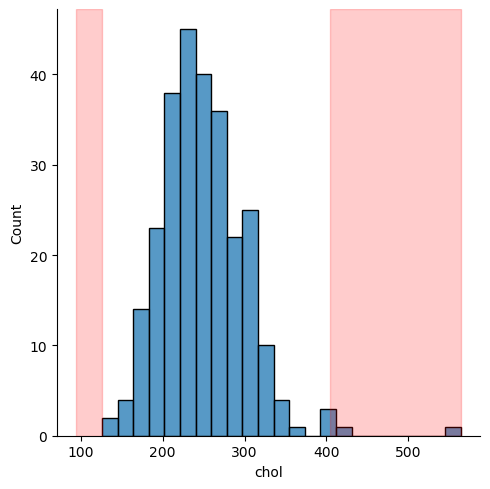

In [59]:
sns.displot(df.chol, kde=False)
plt.axvspan(xmin = threshold_low,xmax=df_cleared2.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = threshold_high,xmax= df.chol.max(),alpha=0.2, color='red')